# Aplicação de Análise de Regressão em Python

Neste notebook apresentamos um caso prático de análise de regressão com dados reais. A análise descrita usa dados socioeconômicos da cidade de Curitiba para a compreensão dos fatores associados à renda média nos bairros da cidade. Os dados foram coletados do [IPPUC](https://www.ippuc.org.br/) (Instituto de Pesquisa e Planejamento Urbano de Curitiba). A análise é baseada na biblioteca [StatsModels](https://www.statsmodels.org), que implementa uma grande gama de modelos de regressão.

In [1]:
# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Lendo dados de um arquivo

Os dados coletados foram agregados em um arquivo CSV, exibido abaixo e disponibilizado no reposítório deste tutorial.

In [2]:
# lê o arquivo CSV
df = pd.read_csv('indices_curitiba.csv')
# mostra o conteúdo do DataFrame
df.head(3)

,Localidade,Renda_Média,Taxa_Analfabetismo,Área_Verde_m2_percapta,Área_Verde_km2,Estabelecimentos_Ativos_Indústria,Estabelecimentos_Ativos_Comércio,Estabelecimentos_Ativos_Serviço,População_Total,Área_hectare,Área_km2,Densidade_Demográfica_Hab_por_ha,Área_Verde_pct,Nível_Urbanização
0,Abranches,650.0,3.71,116.38,1.534982,106.0,373.0,387.0,13189.0,431.63,4.32,30.56,35.532000,Baixo
1,Ahú,1500.0,0.87,26.24,0.301921,147.0,548.0,727.0,11506.0,185.49,1.85,62.03,16.320048,Médio
2,Alto Boqueirão,650.0,3.36,61.88,3.321273,353.0,1421.0,749.0,53671.0,1198.73,11.99,44.77,27.700357,Baixo


## Criando o primeiro modelo

Nosso objetivo é entender fatores associados à renda média (nossa variável dependente). Das variáveis disponíveis, seria razoável imaginar que a taxa de analfabetismo possui uma associação com a renda. Podemos então começar criando um modelo univariado com a taxa de analfabetismo como variável independente:

In [3]:
model = smf.ols("Renda_Média ~ Taxa_Analfabetismo", data=df)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Renda_Média   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     97.12
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           4.73e-15
Time:                        16:13:14   Log-Likelihood:                -526.90
No. Observations:                  75   AIC:                             1058.
Df Residuals:                      73   BIC:                             1062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1413.9665     56.964     24.822      0.000    1300.436    1527.496
Taxa_Analfabetismo  -163.0535     16.545     -9.855      0.000    -196.027    -130.079
==============================================================================
Omnibus:                       18.298   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.067
Skew:                           1.259   Prob(JB):                     1.62e-05
Kurtosis:                       3.848   Cond. No.                         6.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nosso modelo inicial ficou bem razoável, explicando quase 60% da variância ($r^2 = 0.57$). Mas temos muitas outras variáveis e poderíamos capturar melhor esta variância expandindo o número de variáveis independentes. Vamos tentar adicionar todas as variáveis numéricas disponíveis:

In [4]:
model = smf.ols("Renda_Média ~ Taxa_Analfabetismo + Área_Verde_m2_percapta + Área_Verde_km2 + Estabelecimentos_Ativos_Indústria + Estabelecimentos_Ativos_Comércio + Estabelecimentos_Ativos_Serviço + População_Total + Área_hectare + Área_km2 + Densidade_Demográfica_Hab_por_ha + Área_Verde_pct", data=df)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Renda_Média   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     16.18
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           1.84e-14
Time:                        16:13:14   Log-Likelihood:                -508.32
No. Observations:                  75   AIC:                             1041.
Df Residuals:                      63   BIC:                             1068.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          1187.8607    203.594      5.834      0.000     781.010    1594.711
Taxa_Analfabetismo                 -114.6077     18.951     -6.048      0.000    -152.478     -76.738
Área_Verde_m2_percapta                0.0401      0.066      0.610      0.544      -0.091       0.171
Área_Verde_km2                      -35.3498    100.874     -0.350      0.727    -236.931     166.231
Estabelecimentos_Ativos_Indústria     0.6499      0.391      1.662      0.102      -0.132       1.431
Estabelecimentos_Ativos_Comércio     -0.4849      0.125     -3.880      0.000      -0.735      -0.235
Estabelecimentos_Ativos_Serviço       0.2630      0.067      3.933      0.000       0.129       0.397
População_Total                      -0.0030      0.005     -0.619      0.538      -0.013       0.007
Área_hectare                       -147.7656     96.583     -1.530      0.131    -340.770      45.239
Área_km2                           1.479e+04   9653.373      1.532      0.131   -4501.410    3.41e+04
Densidade_Demográfica_Hab_por_ha      4.8789      2.474      1.972      0.053      -0.066       9.823
Área_Verde_pct                       -1.3133      5.391     -0.244      0.808     -12.085       9.459
==============================================================================
Omnibus:                        2.545   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                2.321
Skew:                           0.428   Prob(JB):                        0.313
Kurtosis:                       2.904   Cond. No.                     1.31e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Adicionando variáveis categóricas

Temos à nossa disposição uma variável categórica (`Nível_Urbanização`). Para adicionar variáveis categóricas ao modelo, basta incluir a variável na fórmula dentro da função C, assim: **`C(Nível_Urbanização)`**

In [5]:
model = smf.ols("Renda_Média ~ C(Nível_Urbanização) + Taxa_Analfabetismo + Área_Verde_m2_percapta + Área_Verde_km2 + Estabelecimentos_Ativos_Indústria + Estabelecimentos_Ativos_Comércio + Estabelecimentos_Ativos_Serviço + População_Total + Área_hectare + Área_km2 + Densidade_Demográfica_Hab_por_ha + Área_Verde_pct", data=df)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Renda_Média   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     20.10
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           2.57e-17
Time:                        16:13:14   Log-Likelihood:                -496.20
No. Observations:                  75   AIC:                             1020.
Df Residuals:                      61   BIC:                             1053.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           926.4926    184.176      5.030      0.000     558.210    1294.775
C(Nível_Urbanização)[T.Baixo]       -74.6021    146.755     -0.508      0.613    -368.057     218.853
C(Nível_Urbanização)[T.Médio]       252.6534     73.514      3.437      0.001     105.654     399.653
Taxa_Analfabetismo                 -101.6751     16.660     -6.103      0.000    -134.990     -68.361
Área_Verde_m2_percapta                0.0356      0.058      0.609      0.545      -0.081       0.152
Área_Verde_km2                       25.0539     88.107      0.284      0.777    -151.126     201.234
Estabelecimentos_Ativos_Indústria     0.7553      0.343      2.205      0.031       0.070       1.440
Estabelecimentos_Ativos_Comércio     -0.3609      0.111     -3.239      0.002      -0.584      -0.138
Estabelecimentos_Ativos_Serviço       0.1802      0.061      2.943      0.005       0.058       0.303
População_Total                      -0.0045      0.004     -1.062      0.293      -0.013       0.004
Área_hectare                       -204.7128     85.159     -2.404      0.019    -374.999     -34.427
Área_km2                           2.046e+04   8511.288      2.404      0.019    3445.434    3.75e+04
Densidade_Demográfica_Hab_por_ha      6.0447      2.177      2.777      0.007       1.692      10.398
Área_Verde_pct                        3.3819      6.133      0.551      0.583      -8.881      15.645
==============================================================================
Omnibus:                        0.209   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.901   Jarque-Bera (JB):                0.323
Skew:                           0.116   Prob(JB):                        0.851
Kurtosis:                       2.777   Cond. No.                     1.34e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Adicionar uma variável categórica é equivalente a adicionar uma coluna para cada nível de categoria e usar 1 para marcar o nível adequado de cada observação, como exibido abaixo:

In [6]:
pd.get_dummies(df.set_index('Localidade')['Nível_Urbanização']).head()

,Alto,Baixo,Médio
Localidade,,,
Abranches,0,1,0
Ahú,0,0,1
Alto Boqueirão,0,1,0
Alto da Glória,0,0,1
Alto da Rua XV,0,0,1


Porém, esta estratégia adiciona redundância ao modelo (e consequentemente problemas de multicolinearidade). Isto porque um dos níveis poderia ser representado por linhas contendo todos os valores zerados. No exemplo, poderíamos retirar a coluna `Baixo` e considerar que sempre que os valores para `Médio` e `Alto` forem 0, o bairro é do nível `Baixo`. Então, na prática, sempre temos um número a menos de níveis de uma categoria. No modelo acima o statsmodels estabeleceu o nível básico (valores zerados) como `Alto`. Mas podemos especificar qual nível gostaríamos de usar como nível básico usando o parâmetro `reference` como no exemplo abaixo:

In [7]:
model = smf.ols("Renda_Média ~ C(Nível_Urbanização, Treatment(reference='Baixo')) + Taxa_Analfabetismo + Área_Verde_m2_percapta + Área_Verde_km2 + Estabelecimentos_Ativos_Indústria + Estabelecimentos_Ativos_Comércio + Estabelecimentos_Ativos_Serviço + População_Total + Área_hectare + Área_km2 + Densidade_Demográfica_Hab_por_ha + Área_Verde_pct", data=df)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Renda_Média   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     20.10
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           2.57e-17
Time:                        16:13:14   Log-Likelihood:                -496.20
No. Observations:                  75   AIC:                             1020.
Df Residuals:                      61   BIC:                             1053.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                     851.8904    237.936      3.580      0.001     376.109    1327.672
C(Nível_Urbanização, Treatment(reference='Baixo'))[T.Alto]     74.6021    146.755      0.508      0.613    -218.853     368.057
C(Nível_Urbanização, Treatment(reference='Baixo'))[T.Médio]   327.2556    116.187      2.817      0.007      94.925     559.586
Taxa_Analfabetismo                                           -101.6751     16.660     -6.103      0.000    -134.990     -68.361
Área_Verde_m2_percapta                                          0.0356      0.058      0.609      0.545      -0.081       0.152
Área_Verde_km2                                                 25.0539     88.107      0.284      0.777    -151.126     201.234
Estabelecimentos_Ativos_Indústria                               0.7553      0.343      2.205      0.031       0.070       1.440
Estabelecimentos_Ativos_Comércio                               -0.3609      0.111     -3.239      0.002      -0.584      -0.138
Estabelecimentos_Ativos_Serviço                                 0.1802      0.061      2.943      0.005       0.058       0.303
População_Total                                                -0.0045      0.004     -1.062      0.293      -0.013       0.004
Área_hectare                                                 -204.7128     85.159     -2.404      0.019    -374.999     -34.427
Área_km2                                                     2.046e+04   8511.288      2.404      0.019    3445.434    3.75e+04
Densidade_Demográfica_Hab_por_ha                                6.0447      2.177      2.777      0.007       1.692      10.398
Área_Verde_pct                                                  3.3819      6.133      0.551      0.583      -8.881      15.645
==============================================================================
Omnibus:                        0.209   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.901   Jarque-Bera (JB):                0.323
Skew:                           0.116   Prob(JB):                        0.851
Kurtosis:                       2.777   Cond. No.                     1.34e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Refinando o modelo

O modelo definido acima parece bom, pois tem um ótimo $r^2$ (0.81). Porém, podemos identificar alguns problemas. Primeiro, o $r^2$ ajustado fica muito abaixo do não ajustado, indicando que incluímos variáveis que não ajudam o modelo. E pior: o segundo *warning* sugere que podemos ter problemas de multicolinearidade (variáveis independentes correlacionadas). 

Para resolver este e outros problemas (como over-fitting), precisamos selecionar apenas as melhores variáveis para o modelo. Esta não é uma tarefa trivial e existem diversas técnicas propostas, como *forward* e *backward elimination*, que estão fora do escopo deste tutorial. Aqui, vamos apenas avaliar a matriz de correlação entre as variáveis para reduzir o número de variáveis. O gráfico abaixo mostra um mapa de calor com as correlações:

<AxesSubplot:>

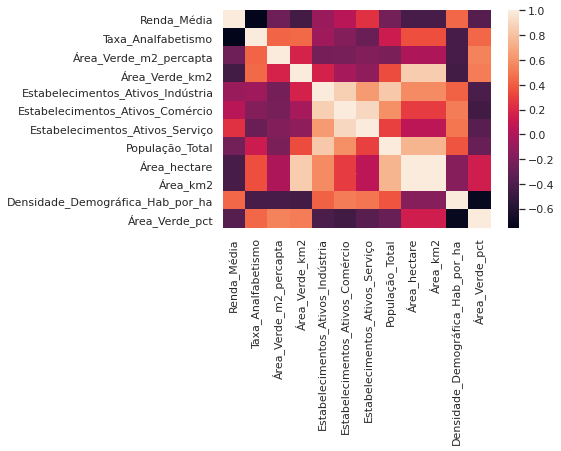

In [9]:
sns.heatmap(df.corr())

O gráfico mostra diversos conjuntos de variáveis correlacionadas, como os estabelecimentos ativos e áreas. Podemos usar a estratégia de escolher apenas uma variável para cada aspecto que pode estar relacionado com a renda. Por exemplo, podemos escolher a taxa de analfabetismo para representar educação, estabelecimentos de serviços para representar atividade econômica, densidade populacional para demografia e nível de urbanição para representar o desenvolvimento.

Antes, precisamos resolver um problema com a variável de estabelecimentos de serviços: ela contém números absolutos de estabelecimentos, porém estamos tentando estimar médias de renda. Em geral, ter números absolutos em um modelo pode trazer diversos problemas e é sempre importante normalizar os valores. Para isto, vamos gerar uma nova variável com o valor percapta e criamos o modelo na sequência:

In [22]:
df['Estabelecimentos_Ativos_Serviço_percapta'] = df['Estabelecimentos_Ativos_Serviço']/df['População_Total']

In [23]:
model = smf.ols("Renda_Média ~ C(Nível_Urbanização) + Taxa_Analfabetismo + Estabelecimentos_Ativos_Serviço_percapta + Densidade_Demográfica_Hab_por_ha", data=df)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Renda_Média   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     37.42
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           2.28e-18
Time:                        17:11:41   Log-Likelihood:                -509.45
No. Observations:                  75   AIC:                             1031.
Df Residuals:                      69   BIC:                             1045.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  815.4506    126.794      6.431      0.000     562.503    1068.399
C(Nível_Urbanização)[T.Baixo]              203.3842     88.393      2.301      0.024      27.046     379.723
C(Nível_Urbanização)[T.Médio]              304.6900     67.470      4.516      0.000     170.091     439.289
Taxa_Analfabetismo                        -109.4297     16.811     -6.510      0.000    -142.966     -75.893
Estabelecimentos_Ativos_Serviço_percapta  1851.0083    456.567      4.054      0.000     940.181    2761.835
Densidade_Demográfica_Hab_por_ha             3.7582      1.330      2.827      0.006       1.106       6.411
==============================================================================
Omnibus:                        8.593   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.221
Skew:                           0.687   Prob(JB):                       0.0164
Kurtosis:                       3.863   Cond. No.                         942.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O novo modelo tem um $r^2$ menor, mas a diferença com o valor ajustado é pequena. Além disso, não temos mais o aviso de problemas de multicolinearidade. O modelo parece bom, com várias variáveis estatisticamente significativas. Mas é sempre importante verificar a gráfico de resíduos para se ter segurança no modelo.

## Verificando o gráfico de resíduos e ajustando variáveis

O gráfico de resíduos mostra, para cada valor da nossa variável dependente (neste caso a renda média, representada no eixo x), o erro residual do modelo (que é o valor real menos o valor previsto para a variável). Um bom gráfico de resíduos não apresenta grandes variações na variância do erro e nem tendências de aumento ou diminuição. O gráfico abaixo mostra problemas de variância e tendência.

<AxesSubplot:>

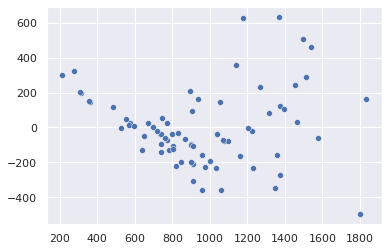

In [12]:
pred_val = response.fittedvalues.copy()
true_val = df['Renda_Média'].values.copy()
residual = true_val - pred_val

sns.scatterplot(x = pred_val, y = residual)

Uma das causas desse tipo de problema é uma interação não linear entre as veriáveis independentes e a variável dependente. Para investigar isto, podemos fazer gráficos de dispersão entre as veriáveis. Como exemplo, vamos fazer só para a variável de taxa de analfabetismo, que é a que tem a maior correlação com a renda segundo nosso mapa de calor.

<AxesSubplot:xlabel='Taxa_Analfabetismo', ylabel='Renda_Média'>

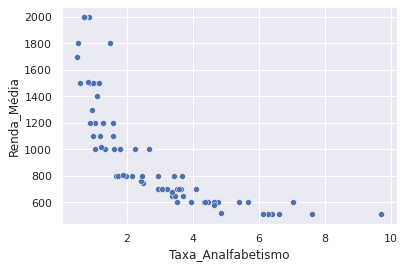

In [13]:
sns.scatterplot(x = df['Taxa_Analfabetismo'], y = df['Renda_Média'])

Fica claro que o relacionamento entre as variáveis não é linear. Vemos que à medida que a renda cai, a taxa também cai, porém mais lentamente quando os valores da taxa ficam mais altos. Podemos aplicar a função logarítmica para redizir não linearmente os valores mais altos e obter uma relação mais linear como no exemplo abaixo:

<AxesSubplot:xlabel='Taxa_Analfabetismo', ylabel='Renda_Média'>

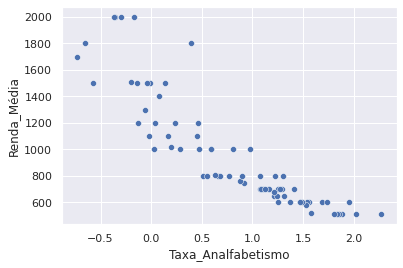

In [14]:
sns.scatterplot(x = np.log(df['Taxa_Analfabetismo']), y = df['Renda_Média'])

Para incluir o log no modelo, basta fazer como no exemplo abaixo. Veja que o modelo ficou mais preciso ($r^2$ = 0.82), mas atenção que a inclusão do log deixa a interpretação do coeficiente da taxa de analfabetismo mais difícil.

In [24]:
model = smf.ols("Renda_Média ~ C(Nível_Urbanização) + np.log(Taxa_Analfabetismo)  + Densidade_Demográfica_Hab_por_ha", data=df)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Renda_Média   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     81.38
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           1.42e-25
Time:                        17:48:27   Log-Likelihood:                -493.69
No. Observations:                  75   AIC:                             997.4
Df Residuals:                      70   BIC:                             1009.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         1103.0390     87.917     12.546      0.000     927.694    1278.384
C(Nível_Urbanização)[T.Baixo]      128.7911     69.292      1.859      0.067      -9.407     266.989
C(Nível_Urbanização)[T.Médio]      180.9268     55.596      3.254      0.002      70.044     291.810
np.log(Taxa_Analfabetismo)        -463.3468     33.919    -13.661      0.000    -530.995    -395.698
Densidade_Demográfica_Hab_por_ha     2.5759      1.067      2.414      0.018       0.448       4.704
==============================================================================
Omnibus:                       17.641   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.891
Skew:                           1.034   Prob(JB):                     1.07e-05
Kurtosis:                       4.746   Cond. No.                         281.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Podemos novamente exibir o gráfico de resíduos (abaixo). Veja que as tendências não estão mais tão fortes, mas ainda há uma variação. A decisão sobre continuar avaliando este tipo de problema depende da aplicação e da complexidade desejada. A solução pode envolver uma combinação de:

- identificação de relacionamentos não lineares entre as variáveis
- inclusão de variáveis que possam explicar melhor o fenômeno
- construção de modelos de regressão mais complexos (como GLM)
- identificação e exclusão de outliers
- identificação de problemas de descontinuidade na dinâmica do fenômeno


<AxesSubplot:>

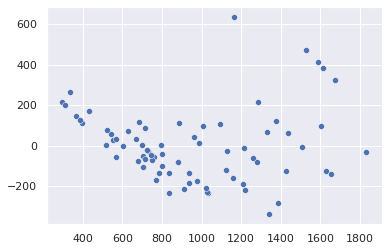

In [17]:
pred_val = response.fittedvalues.copy()
true_val = df['Renda_Média'].values.copy()
residual = true_val - pred_val

sns.scatterplot(x = pred_val, y = residual)